In [1]:
from lcode2dPy.simulation.interface import Simulation, MyDiagnostics,FieldDiagnostics
from lcode2dPy.config.default_config import default_config
from lcode2dPy.beam.beam_generator import make_beam, Gauss, rGauss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Config
config = default_config
config.set('time-step', 1000)
config.set('time-limit', 20000)
config.set('window-length', 30)

# Beam
gamma = 426
angspread = 1e-5
m_proton = 958/0.51

beam_pars = dict(xi_distr=Gauss(sigma=100, vmin=-300, vmax=0),
                r_distr=rGauss(vmin=0, vmax=16),
                ang_distr=Gauss(sigma=angspread, vmin=None, vmax=None),
                pz_distr=Gauss(gamma*m_proton, gamma*m_proton*1e-4, vmin=None, vmax=None),
                Ipeak_kA=40/1000,
                q_m=1/m_proton)



# Setting up simulation
diagnostics = [FieldDiagnostics("E_z", r=0, out='i'),\
               FieldDiagnostics("E_r" ,r=None, period=5000, out='')]
sim = Simulation(beam_pars=beam_pars, diagnostics=diagnostics, config=config)

In [3]:
sim.step(19)

Number of particles: 236448
Number of particles in the middle layer: 200
[##############################] t=19000.0

In [33]:
Ez = diagnostics[0]
Ez.make_gif('firr_no_grid')

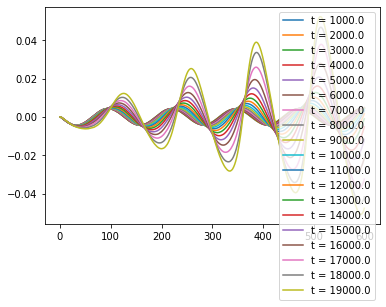

In [30]:
for key in Ez.data.keys():
    plt.plot(Ez.data[key], label=f't = {key}')
plt.legend();

In [28]:
beam_slice = sim.beam_source.get_beam_slice(10, -config.getfloat('window-length'))

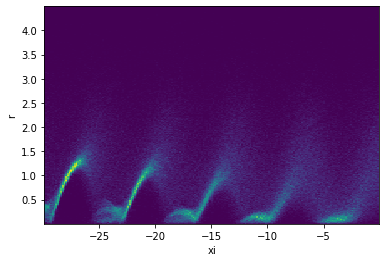

In [29]:
beam = beam_slice.particles
plt.hist2d(beam['xi'], beam['r'], 200);
plt.xlabel('xi')
plt.ylabel('r');